In [1]:
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('Datasets/AirPassengers.csv')
print data.head()
print '\n Data Types:'
print data.dtypes
data.shape

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


(144, 2)

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('Datasets/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print data.head()
print '\n Data Types:'
print data.dtypes

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

 Data Types:
#Passengers    int64
dtype: object


In [4]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)

In [5]:
ts = data['#Passengers'] 
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [6]:
#Two ways to specify an Index
#1. Specific the index as a string constant:
ts['1949-01-01']

#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [9]:
#Specify the entire range:
ts['1949-01-01':'1949-05-01']

#Specify a year and it will return all months
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

' For practical purposes we can assume the series to be stationary if it has constant statistical properties over time, \nie. the following:constant mean, constant variance and an autocovariance that does not depend on time.\n'

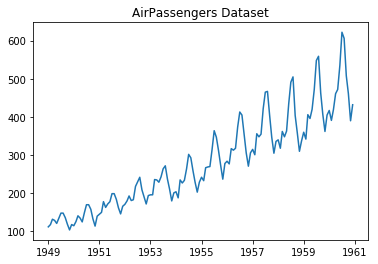

In [56]:
plt.plot(ts)
plt.title('AirPassengers Dataset')
''' For practical purposes we can assume the series to be stationary if it has constant statistical properties over time, 
ie. the following:constant mean, constant variance and an autocovariance that does not depend on time.
'''

In [39]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #NOTEL pd.rolling_mean and pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
    #Series.rolling(window=12,center=False).mean() and Series.rolling(window=12,center=False).std() 
    rolmean = timeseries.rolling(window=12,center=False).mean() #rolling_mean(timeseries, window=12)
    rolstd = timeseries.rolling(window=12,center=False).std() #rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

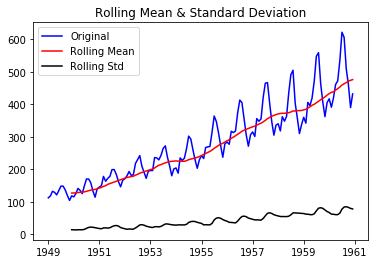

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


"Perform Dickey-Fuller test: The test results comprise of a Test Statistic and some Critical Values for difference confidence \nlevels. If the 'Test Statistic' is less than the 'Critical Value', we can reject the null hypothesis and say that the series is \nstationary.\nThough the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. \nAlso, the test statistic is way more than the critical values. Note that the signed values should be compared and not the \nabsolute values.\n"

In [40]:
test_stationarity(ts)
'''Perform Dickey-Fuller test: The test results comprise of a Test Statistic and some Critical Values for difference confidence 
levels. If the 'Test Statistic' is less than the 'Critical Value', we can reject the null hypothesis and say that the series is 
stationary.
Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. 
Also, the test statistic is way more than the critical values. Note that the signed values should be compared and not the 
absolute values.
'''

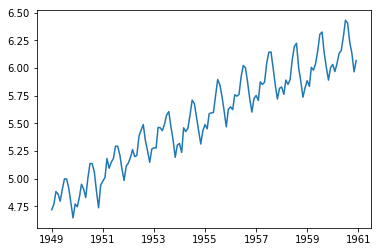

In [41]:
ts_log = np.log(ts)
plt.plot(ts_log)

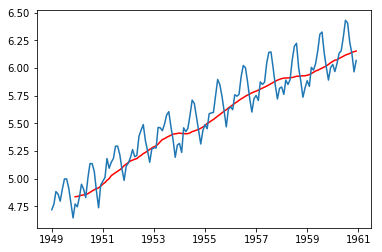

In [35]:
moving_avg = ts_log.rolling(window=12,center=False).mean()
plt.plot(moving_avg, color='red')
plt.plot(ts_log)

In [42]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

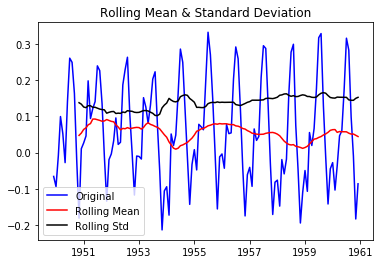

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (5%)             -2.886151
Critical Value (1%)             -3.486535
Critical Value (10%)            -2.579896
dtype: float64


'The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than \nthe 5% critical values so we can say with 95% confidence that this is a stationary series. \nHowever, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take \nyearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. \n'

In [50]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)
'''The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than 
the 5% critical values so we can say with 95% confidence that this is a stationary series. 
However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take 
yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. 
'''

"We take a 'weighted moving average' where more recent values are given a higher weight. There can be many technique \nfor assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous \nvalues with a decay factor.\n"

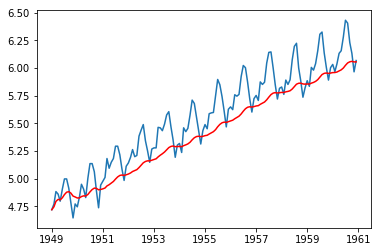

In [52]:
expwighted_avg = ts_log.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean() #pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
'''We take a 'weighted moving average' where more recent values are given a higher weight. There can be many technique 
for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous 
values with a decay factor.
'''

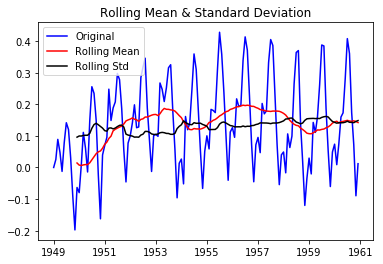

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


'This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than \nthe 1% critical value, which is better than the previous case\n'

In [49]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)
'''This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than 
the 1% critical value, which is better than the previous case
'''

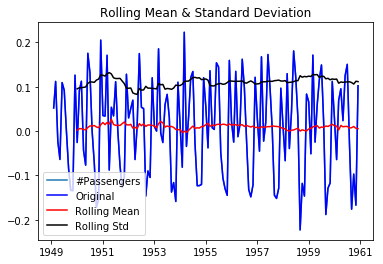

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (1%)             -3.482501
Critical Value (10%)            -2.578960
dtype: float64


In [57]:
#Moving away from the simpler techniques used above - taking the log, moving avergae and weighted moving averages
# First order differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

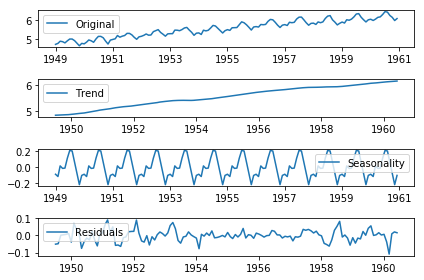

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

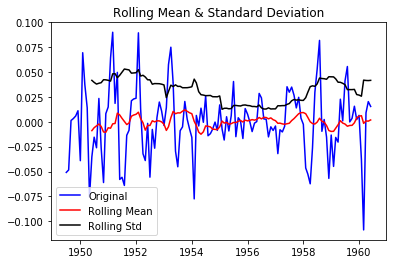

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (5%)           -2.885538e+00
Critical Value (1%)           -3.485122e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [59]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

'p: The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, \nin this case p=2.\nq: The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, \nin this case q=2.\n'

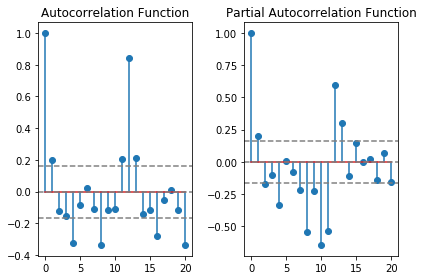

In [81]:
'''1. A strictly stationary series with no dependence among the values: This is the easy case wherein we can model the 
residuals as white noise. But this is very rare. 
2. A series with significant dependence among values: In this case we need to use some statistical models like ARIMA to 
forecast the data.
'''
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: It is a measure of the correlation between TS with a lagged version of itself. For instance at lag 5, 
#ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
plt.subplot(121) 
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations 
#already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already 
#explained by lags 1 to 4.
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

'''p: The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, 
in this case p=2.
q: The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, 
in this case q=2.
'''


Text(0.5,1,u'RSS: 1.5023')

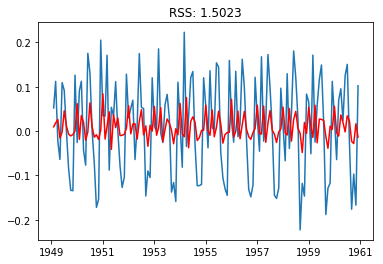

In [72]:
#ARMIA
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5,1,u'RSS: 1.4721')

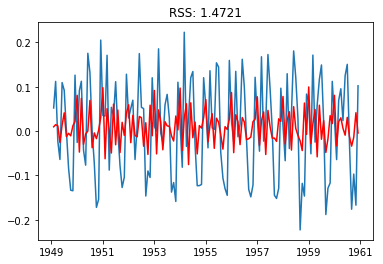

In [85]:
#MA MODEL
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5,1,u'RSS: 1.0292')

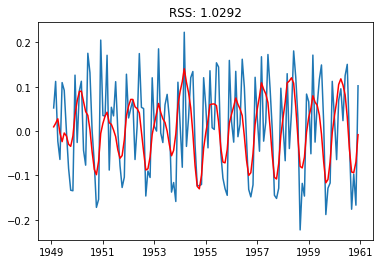

In [98]:
#ARIMA MODEL
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

Text(0.5,1,u'RMSE: 90.1047')

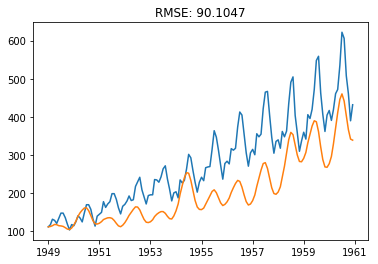

In [99]:
#Taking it back to original scale

#First step would be to store the predicted results as a separate series and observe it.
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

#The way to convert the differencing to log scale is to add these differences consecutively to the base number. 
#An easy way to do it is to first determine the cumulative sum at index and then add it to the base number.
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

#Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences 
#to it. 
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

#Last step is to take the exponent and compare with the original series.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))